In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import gc # We're gonna be clearing memory a lot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
p = sns.color_palette()
from scipy.stats import chi2_contingency

In [5]:
from scipy import stats
np.random.seed(seed=42)

from collections import Counter

## The focus of this Walmart dataset will be the following
* Focus of the three catgories Food, Household, and Hobbies
* The dataset dates are from 1/2011 - 1/2016. Conduct t - test of Average sales of the Household items
* Perform analysis to see if there's a seasonal trend amougst the category item


In [6]:
dates = pd.read_csv("/Users/aaronkg1/Downloads/walmart_analysis/walmartcalender.csv")

In [7]:
dates.to_csv("/Users/aaronkg1/Downloads/walmart_analysis/walmartcalender.csv")

In [8]:
dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1969 non-null   int64 
 1   Unnamed: 0.1      1969 non-null   int64 
 2   Unnamed: 0.1.1    1969 non-null   int64 
 3   Unnamed: 0.1.1.1  1969 non-null   int64 
 4   date              1969 non-null   object
 5   wm_yr_wk          1969 non-null   int64 
 6   weekday           1969 non-null   object
 7   wday              1969 non-null   int64 
 8   month             1969 non-null   int64 
 9   year              1969 non-null   int64 
 10  d                 1969 non-null   object
 11  event_name_1      162 non-null    object
 12  event_type_1      162 non-null    object
 13  event_name_2      5 non-null      object
 14  event_type_2      5 non-null      object
 15  snap_CA           1969 non-null   int64 
 16  snap_TX           1969 non-null   int64 
 17  snap_WI       

In [9]:
dates.head(4)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,0,0,0,0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,1,1,1,1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2,2,2,2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,3,3,3,3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0


In [10]:
date = dates[['date', 'd']]

In [11]:
date

,date,d
0,2011-01-29,d_1
1,2011-01-30,d_2
2,2011-01-31,d_3
3,2011-02-01,d_4
4,2011-02-02,d_5
...,...,...
1964,2016-06-15,d_1965
1965,2016-06-16,d_1966
1966,2016-06-17,d_1967
1967,2016-06-18,d_1968


In [12]:
dates.tail(4)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
1965,1965,1965,1965,1965,2016-06-16,11620,Thursday,6,6,2016,d_1966,NaN,NaN,NaN,NaN,0,0,0
1966,1966,1966,1966,1966,2016-06-17,11620,Friday,7,6,2016,d_1967,NaN,NaN,NaN,NaN,0,0,0
1967,1967,1967,1967,1967,2016-06-18,11621,Saturday,1,6,2016,d_1968,NaN,NaN,NaN,NaN,0,0,0
1968,1968,1968,1968,1968,2016-06-19,11621,Sunday,2,6,2016,d_1969,NBAFinalsEnd,Sporting,Father's day,Cultural,0,0,0


In [13]:
sport = dates[dates['event_type_1'] == 'Sporting']
sport

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
8,8,8,8,8,2011-02-06,11102,Sunday,2,2,2011,d_9,SuperBowl,Sporting,NaN,NaN,1,1,1
122,122,122,122,122,2011-05-31,11118,Tuesday,4,5,2011,d_123,NBAFinalsStart,Sporting,NaN,NaN,0,0,0
134,134,134,134,134,2011-06-12,11120,Sunday,2,6,2011,d_135,NBAFinalsEnd,Sporting,NaN,NaN,0,1,1
372,372,372,372,372,2012-02-05,11202,Sunday,2,2,2012,d_373,SuperBowl,Sporting,NaN,NaN,1,1,1
500,500,500,500,500,2012-06-12,11220,Tuesday,4,6,2012,d_501,NBAFinalsStart,Sporting,NaN,NaN,0,1,1
509,509,509,509,509,2012-06-21,11221,Thursday,6,6,2012,d_510,NBAFinalsEnd,Sporting,NaN,NaN,0,0,0
736,736,736,736,736,2013-02-03,11302,Sunday,2,2,2013,d_737,SuperBowl,Sporting,NaN,NaN,1,1,1
859,859,859,859,859,2013-06-06,11319,Thursday,6,6,2013,d_860,NBAFinalsStart,Sporting,NaN,NaN,1,1,1
873,873,873,873,873,2013-06-20,11321,Thursday,6,6,2013,d_874,NBAFinalsEnd,Sporting,NaN,NaN,0,0,0
1100,1100,1100,1100,1100,2014-02-02,11401,Sunday,2,2,2014,d_1101,SuperBowl,Sporting,NaN,NaN,1,0,1


In [14]:
e = dates[dates['event_type_1'] == 'Religious']
e.event_type_1.value_counts()

Religious    55
Name: event_type_1, dtype: int64

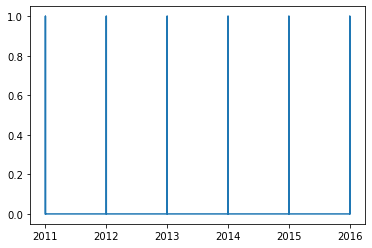

In [15]:
#fig, ax = plt.subplots()
plt.plot(dates["year"], dates['event_type_1'] == 'Religious')
plt.xticks(rotation=0)
plt.show()



In [16]:
dates.event_type_1.value_counts()

Religious    55
National     52
Cultural     37
Sporting     18
Name: event_type_1, dtype: int64

In [17]:
dates.event_type_2.count()

5

In [18]:
dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1969 non-null   int64 
 1   Unnamed: 0.1      1969 non-null   int64 
 2   Unnamed: 0.1.1    1969 non-null   int64 
 3   Unnamed: 0.1.1.1  1969 non-null   int64 
 4   date              1969 non-null   object
 5   wm_yr_wk          1969 non-null   int64 
 6   weekday           1969 non-null   object
 7   wday              1969 non-null   int64 
 8   month             1969 non-null   int64 
 9   year              1969 non-null   int64 
 10  d                 1969 non-null   object
 11  event_name_1      162 non-null    object
 12  event_type_1      162 non-null    object
 13  event_name_2      5 non-null      object
 14  event_type_2      5 non-null      object
 15  snap_CA           1969 non-null   int64 
 16  snap_TX           1969 non-null   int64 
 17  snap_WI       

In [19]:
dates.event_name_1.value_counts()

Pesach End             6
StPatricksDay          6
MemorialDay            6
LentStart              6
LentWeek2              6
NBAFinalsStart         6
Purim End              6
Mother's day           6
PresidentsDay          6
ValentinesDay          6
NBAFinalsEnd           6
SuperBowl              6
Ramadan starts         6
NewYear                5
Christmas              5
MartinLutherKingDay    5
OrthodoxEaster         5
Thanksgiving           5
ColumbusDay            5
Cinco De Mayo          5
EidAlAdha              5
OrthodoxChristmas      5
LaborDay               5
Eid al-Fitr            5
Easter                 5
Halloween              5
VeteransDay            5
IndependenceDay        5
Chanukah End           5
Father's day           4
Name: event_name_1, dtype: int64

In [20]:
sales = pd.read_csv("/Users/aaronkg1/Downloads/walmart_analysis/sales_train_validation.csv")

In [22]:
sales.to_csv("/Users/aaronkg1/Downloads/walmart_analysis/sales_train_validation.csv")

In [23]:
sales.head(4)

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2


In [24]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1919 entries, id to d_1913
dtypes: int64(1913), object(6)
memory usage: 446.4+ MB


In [25]:
sales.columns

Index(['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'd_1',
       'd_2', 'd_3', 'd_4',
       ...
       'd_1904', 'd_1905', 'd_1906', 'd_1907', 'd_1908', 'd_1909', 'd_1910',
       'd_1911', 'd_1912', 'd_1913'],
      dtype='object', length=1919)

In [26]:
sales.describe()

,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
count,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,...,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000
mean,1.070220,1.041292,0.780026,0.833454,0.627944,0.958052,0.918662,1.244080,1.073663,0.838701,...,1.370581,1.586159,1.693670,1.248245,1.232207,1.159167,1.149000,1.328862,1.605838,1.633158
std,5.126689,5.365468,3.667454,4.415141,3.379344,4.785947,5.059495,6.617729,5.917204,4.206199,...,3.740017,4.097191,4.359809,3.276925,3.125471,2.876026,2.950364,3.358012,4.089422,3.812248
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000
max,360.000000,436.000000,207.000000,323.000000,296.000000,314.000000,316.000000,370.000000,385.000000,353.000000,...,129.000000,160.000000,204.000000,98.000000,100.000000,88.000000,77.000000,141.000000,171.000000,130.000000


In [27]:
sales.cat_id.value_counts()

FOODS        14370
HOUSEHOLD    10470
HOBBIES       5650
Name: cat_id, dtype: int64

In [28]:
sales.dept_id.value_counts()

FOODS_3        8230
HOUSEHOLD_1    5320
HOUSEHOLD_2    5150
HOBBIES_1      4160
FOODS_2        3980
FOODS_1        2160
HOBBIES_2      1490
Name: dept_id, dtype: int64

In [29]:
sales.head(4)


,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2


Text(0, 0.5, 'sales')

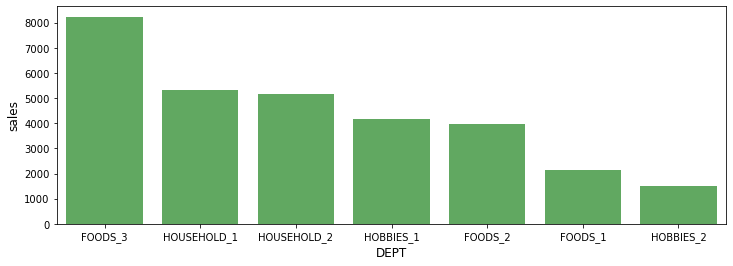

In [30]:
sal = sales.dept_id.value_counts()
plt.figure(figsize=(12,4))
sns.barplot(sal.index, sal.values, alpha=0.8, color=p[2])
plt.xlabel('DEPT', fontsize=12)
plt.ylabel('sales', fontsize=12)

Text(0, 0.5, 'sales')

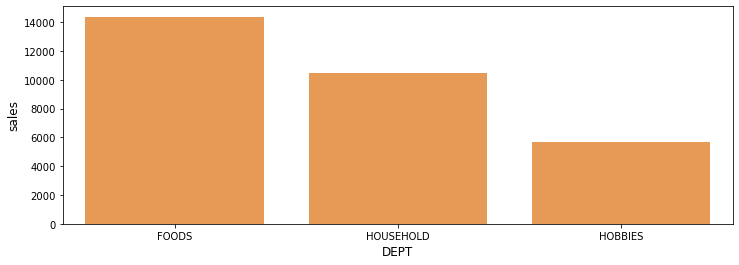

In [31]:
cat = sales.cat_id.value_counts()
plt.figure(figsize=(12,4))
sns.barplot(cat.index, cat.values, alpha=0.8, color=p[1])
plt.xlabel('DEPT', fontsize=12)
plt.ylabel('sales', fontsize=12)

In [32]:
sales[sales['cat_id'] == 'FOODS'].count()

id          14370
item_id     14370
dept_id     14370
cat_id      14370
store_id    14370
            ...  
d_1909      14370
d_1910      14370
d_1911      14370
d_1912      14370
d_1913      14370
Length: 1919, dtype: int64

In [33]:
SAL = sales['cat_id'] == 'HOUSEHOLD'
SAL.value_counts()

False    20020
True     10470
Name: cat_id, dtype: int64

In [34]:
sales[sales['cat_id'] == 'HOBBIES'].count()

id          5650
item_id     5650
dept_id     5650
cat_id      5650
store_id    5650
            ... 
d_1909      5650
d_1910      5650
d_1911      5650
d_1912      5650
d_1913      5650
Length: 1919, dtype: int64

#### Food_3 seems to have the most sales of Walmart sales item. 

* Let see if we can find out what type of food are consideer Food_3. 
        --- Let see if it's seasonal. 

In [35]:
sales.groupby(['dept_id'])['item_id'].unique()

dept_id
FOODS_1        [FOODS_1_001, FOODS_1_002, FOODS_1_003, FOODS_...
FOODS_2        [FOODS_2_001, FOODS_2_002, FOODS_2_003, FOODS_...
FOODS_3        [FOODS_3_001, FOODS_3_002, FOODS_3_003, FOODS_...
HOBBIES_1      [HOBBIES_1_001, HOBBIES_1_002, HOBBIES_1_003, ...
HOBBIES_2      [HOBBIES_2_001, HOBBIES_2_002, HOBBIES_2_003, ...
HOUSEHOLD_1    [HOUSEHOLD_1_001, HOUSEHOLD_1_002, HOUSEHOLD_1...
HOUSEHOLD_2    [HOUSEHOLD_2_001, HOUSEHOLD_2_002, HOUSEHOLD_2...
Name: item_id, dtype: object

In [36]:
sales.groupby(['dept_id'])['item_id'].value_counts()

dept_id      item_id        
FOODS_1      FOODS_1_001        10
             FOODS_1_002        10
             FOODS_1_003        10
             FOODS_1_004        10
             FOODS_1_005        10
                                ..
HOUSEHOLD_2  HOUSEHOLD_2_512    10
             HOUSEHOLD_2_513    10
             HOUSEHOLD_2_514    10
             HOUSEHOLD_2_515    10
             HOUSEHOLD_2_516    10
Name: item_id, Length: 3049, dtype: int64

In [37]:
prices = pd.read_csv("/Users/aaronkg1/Downloads/walmart_analysis/sell_prices.csv")

In [39]:
prices.to_csv("/Users/aaronkg1/Downloads/walmart_analysis/sell_prices.csv")

In [40]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6841121 entries, 0 to 6841120
Data columns (total 4 columns):
 #   Column      Dtype  
---  ------      -----  
 0   store_id    object 
 1   item_id     object 
 2   wm_yr_wk    int64  
 3   sell_price  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 208.8+ MB


In [41]:
group = prices.groupby(['store_id'])['sell_price']
group.value_counts()

store_id  sell_price
CA_1      2.98          28599
          1.98          26350
          2.50          20298
          3.98          18918
          3.97          17818
                        ...  
WI_3      13.21             1
          13.99             1
          15.07             1
          17.65             1
          20.95             1
Name: sell_price, Length: 6993, dtype: int64

In [42]:
prices.shape

(6841121, 4)

In [43]:
prices.store_id.unique()

array(['CA_1', 'CA_2', 'CA_3', 'CA_4', 'TX_1', 'TX_2', 'TX_3', 'WI_1',
       'WI_2', 'WI_3'], dtype=object)

In [44]:
prices['store_id'].value_counts()

TX_2    701214
TX_1    699796
CA_1    698412
WI_3    696094
CA_3    693990
TX_3    691112
CA_4    679025
WI_2    678171
WI_1    665912
CA_2    637395
Name: store_id, dtype: int64

In [45]:
ca = prices.groupby([prices['store_id'] == 'CA_1'])['sell_price']
ca.sum()

store_id
False    2.709291e+07
True     3.082953e+06
Name: sell_price, dtype: float64

In [47]:
ca2 = prices.groupby([prices['store_id'] == 'CA_2'])['sell_price']

In [ ]:
ca3 = prices.groupby([prices['store_id'] == 'CA_3'])['sell_price']
ca3.mean()

In [48]:
prices.wm_yr_wk.count() 

6841121

In [49]:
item = prices.item_id.value_counts()

Text(0, 0.5, 'sales')

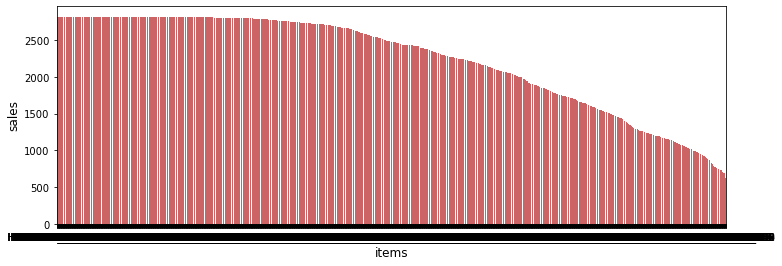

In [50]:
plt.figure(figsize=(12,4))
sns.barplot(item.index, item.values, alpha=0.8, color=p[3])
plt.xlabel('items', fontsize=12)
plt.ylabel('sales', fontsize=12)


### I'll be merrging Category columns from the sales dataset, to the dates dataset.
* I also will be creating a new column stating for just the year date.
* Will be creating alternate dataframes with household goods, and Hobbies

df = pd.merge(df, calendar, on='d', how='left')
df = pd.merge(df, prices, on=['store_id','item_id','wm_yr_wk'], how='left')

melt>>>>>>df = pd.melt(sales, id_vars=['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'], var_name='d', value_name='sold').dropna()

In [51]:
df = pd.melt(sales, id_vars=['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id']) 

In [52]:
df

,id,item_id,dept_id,cat_id,store_id,state_id,variable,value
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
...,...,...,...,...,...,...,...,...
58327365,FOODS_3_823_WI_3_validation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,d_1913,1
58327366,FOODS_3_824_WI_3_validation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,d_1913,0
58327367,FOODS_3_825_WI_3_validation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,d_1913,0
58327368,FOODS_3_826_WI_3_validation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,d_1913,3


In [53]:
df.columns = ['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'd', 'sales']

In [54]:
sales_date = pd.merge(df, date, on='d', how='inner')

In [55]:
sales_date.head(3)

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,date
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29


### Explore the sales data by category

### Focusing on the sales dates dataset, with 'Household' and sales by 'year' in the center.
- Conduct T-test with 'Household'ietms base on sales by year.
1. Null Hypothesis: The avgerage sales in 'Household' category are almost the same every year as independent of Hobbies category. Conduct Random T-Test by different year
2. If Hypothesis is rejected, See if the averages are seasonally the same in the Household items. 

In [56]:
sd = sales_date[sales_date['cat_id'] == 'HOUSEHOLD']

# sd is the dataset/mask for Household category

In [57]:
H = sales_date['cat_id'] == 'HOBBIES'

In [58]:
sales_date['date'] = pd.to_datetime(sales_date['date'])

In [59]:
sales_date.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58327370 entries, 0 to 58327369
Data columns (total 9 columns):
 #   Column    Dtype         
---  ------    -----         
 0   id        object        
 1   item_id   object        
 2   dept_id   object        
 3   cat_id    object        
 4   store_id  object        
 5   state_id  object        
 6   d         object        
 7   sales     int64         
 8   date      datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 4.3+ GB


In [60]:
# stats.ttest_ind(sales_date[sd]['sales'], sales_date[H]['sales'], equal_var=False)

In [61]:
sales_date['year'] = sales_date.date.dt.year

In [62]:
sales_date.head(5)

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,date,year
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,2011
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,2011
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,2011
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,2011
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,2011


In [63]:
sales_date.describe()

,sales,year
count,5.832737e+07,5.832737e+07
mean,1.126322e+00,2.013209e+03
std,3.873108e+00,1.532086e+00
min,0.000000e+00,2.011000e+03
25%,0.000000e+00,2.012000e+03
50%,0.000000e+00,2.013000e+03
75%,1.000000e+00,2.015000e+03
max,7.630000e+02,2.016000e+03


In [64]:
sf = sales_date['cat_id'] == 'FOODS'

In [65]:
# Total sales for the Food Category
sales_date[sf]['sales'].sum()

45089939

In [66]:
sales_date[sf]['sales'].mean()

1.6402419296459305

In [67]:
# Total item count of the Food category
sales_date[sf]['item_id'].count()

27489810

### Creating a dataframe With only the Household items, seperating by year

In [68]:
# The Household total sales from 2011-2016
sd.sales.sum()

14480670

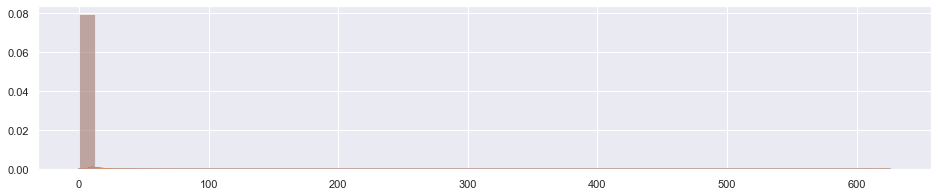

In [69]:
sns.set(rc={'figure.figsize': (16,3)})
sale = sd['sales'].values
sale
sns.distplot(sale)
sns.distplot(sale)
# plt.axvline(ages_mean,0, 1, color = 'red')

In [70]:
# Total items in the Household category
sd.item_id.count()

20029110

In [71]:
sd.sales.std()

2.086400445648674

In [72]:
np.std(sd['sales'])

2.086400393564471

In [73]:
sd.head(3)

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,date
565,HOUSEHOLD_1_001_CA_1_validation,HOUSEHOLD_1_001,HOUSEHOLD_1,HOUSEHOLD,CA_1,CA,d_1,3,2011-01-29
566,HOUSEHOLD_1_002_CA_1_validation,HOUSEHOLD_1_002,HOUSEHOLD_1,HOUSEHOLD,CA_1,CA,d_1,1,2011-01-29
567,HOUSEHOLD_1_003_CA_1_validation,HOUSEHOLD_1_003,HOUSEHOLD_1,HOUSEHOLD,CA_1,CA,d_1,0,2011-01-29


In [74]:
np.std(sd['sales'], ddof=1)

2.086400445648674

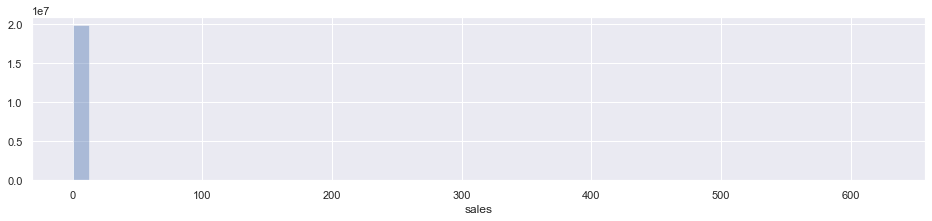

In [75]:
sns.distplot(sd['sales'], kde=False)

In [76]:
h = sales_date[sales_date['cat_id'] == 'HOBBIES']

In [77]:
# Total number of items in the Hobbies category
sales_date[h]['item_id'].count()

ValueError: Boolean array expected for the condition, not object

In [ ]:
# Total number of sales in the hobbies category
h.sales.sum()

In [79]:
h.sales.std()

2.0366417006610633

### Creating dataframes with only Hobbies realted content and seperating by year

In [80]:
yr_one = sales_date['year'] == 2011
yr_one = h['sales'][yr_one]

In [81]:
yr_two = sales_date['year'] == 2012
yr_two = h['sales'][yr_one]

In [82]:
yr_thr = sales_date['year'] == 2013
yr_thr = h['sales'][yr_thr]

In [83]:
yr_four = sales_date['year'] == 2014
yr_four = h['sales'][yr_thr]

In [84]:
yr_five = sales_date['year'] == 2015
yr_five = h['sales'][yr_thr]

In [85]:
yr_six = sales_date['year'] == 2016
yr_six = h['sales'][yr_thr]

##### Lets Make a dataframe for the Household/sales category for each year (2011-2016)

In [86]:
sales_date['year'].unique()

array([2011, 2012, 2013, 2014, 2015, 2016])

In [87]:
year_one = sales_date['year'] == 2011
year_one = sd['sales'][year_one]

In [88]:
year_one.sum()

1658570

In [89]:
np.mean([year_one])

0.470064250267119

In [90]:
year_two = sales_date['year'] == 2012

In [91]:
year_two = sd['sales'][year_two]

In [92]:
np.mean([year_two])

0.6371918726937751

In [93]:
year_two.mean()

0.6371918726937751

In [94]:
year_thr = sales_date['year'] == 2013

In [95]:
year_thr = sd['sales'][year_thr]

In [96]:
year_thr.mean()

0.7683301278277139

In [97]:
np.mean([year_thr])

0.7683301278277139

In [98]:
year_four = sales_date['year'] == 2014

In [99]:
year_four = sd['sales'][year_four]

In [100]:
year_four.mean()

0.7615771087647683

In [101]:
year_five = sales_date['year'] == 2015

In [102]:
year_five = sd['sales'][year_five]

In [103]:
year_five.mean()

0.8888542607057346

In [104]:
year_six = sales_date['year'] == 2016
year_six = sd['sales'][year_six]


In [105]:
stats.ttest_ind(year_four, yr_six, equal_var=False)

Ttest_indResult(statistic=623.0931468149572, pvalue=0.0)

In [106]:
stats.ttest_ind(year_thr, yr_thr, equal_var=False)

Ttest_indResult(statistic=96.38652428604249, pvalue=0.0)

### T-test conducted on Household items in 2013 vs Hobbies items in 2013

* Result shows that we can a P = 0.0
* Which means we can reject the null Hypothesis That Household items and 
* Hobbie items have different averages in any given year

In [ ]:
sales_date.sample(100)

In [107]:
year_one.std()

1.5545855498719985

In [108]:
yr_one.std()

2.2263758107499343

In [ ]:
np.mean(sd)

In [ ]:
obs = pd.crosstab(sales_date[sd][year_one], sales_date[h][yr_four])
obs

In [ ]:
chi2, p, dof, expected = chi2_contingency(obs.values)

print(f'The test statistic is {chi2}. \nThe p value is {p}.')